In [1]:
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import main Florida dataset
ca_ev_df = pd.read_csv(Path("../../../../data/processed_data/ca_ev_main_dataset.csv"))

In [3]:
#Examine Data
print("Shape:",ca_ev_df.shape)
display(ca_ev_df.columns)
display(ca_ev_df.head(10))

Shape: (600, 8)


Index(['year', 'state', 'county', 'zip_codes', 'population',
       'ev_registrations', 'cumulative_ev_stations', 'median_income'],
      dtype='object')

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986.0,20,0,"69,384"
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886.0,1,1,"54,758"
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540.0,10,0,"78,385"
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039.0,2,0,"46,430"
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009.0,2,0,"40,089"
5,2010,CA,Kern County,"[93203, 93205, 93206, 93215, 93216, 93220, 932...",840996.0,1,0,"47,089"
6,2010,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",64735.0,1,0,"39,491"
7,2010,CA,Los Angeles County,"[90001, 90002, 90003, 90004, 90005, 90006, 900...",9823246.0,360,21,"55,476"
8,2010,CA,Marin County,"[94901, 94903, 94904, 94912, 94913, 94914, 949...",252904.0,15,0,"89,268"
9,2010,CA,Monterey County,"[93426, 93450, 93901, 93902, 93905, 93906, 939...",416373.0,1,0,"59,271"


In [4]:
#Trim CA data for use comparing income and stations
ca_station_inc = ca_ev_df[["year","county","cumulative_ev_stations","median_income"]]

ca_station_inc.head()

,year,county,cumulative_ev_stations,median_income
0,2010,Alameda County,0,"69,384"
1,2010,Amador County,1,"54,758"
2,2010,Contra Costa County,0,"78,385"
3,2010,Fresno County,0,"46,430"
4,2010,Humboldt County,0,"40,089"


In [5]:
ca_station_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    600 non-null    int64 
 1   county                  589 non-null    object
 2   cumulative_ev_stations  600 non-null    int64 
 3   median_income           589 non-null    object
dtypes: int64(2), object(2)
memory usage: 18.9+ KB


In [6]:
#Check Income Values
ca_station_inc["median_income"].sort_values(ascending=True).unique()

array(['100,310', '101,173', '103,997', '104,552', '104,703', '104,888',
       '105,667', '106,761', '110,217', '112,449', '113,776', '115,246',
       '116,178', '119,136', '121,671', '122,641', '124,055', '128,091',
       '130,890', '34,974', '35,270', '35,578', '35,997', '36,132',
       '36,548', '36,563', '36,569', '36,862', '36,890', '37,170',
       '37,495', '37,672', '37,709', '37,860', '37,909', '37,948',
       '38,147', '38,497', '38,524', '38,753', '39,296', '39,302',
       '39,349', '39,402', '39,491', '39,525', '39,626', '40,089',
       '40,106', '40,307', '40,376', '40,446', '40,687', '40,830',
       '40,846', '40,847', '40,884', '41,001', '41,079', '41,194',
       '41,255', '41,287', '41,426', '41,699', '41,772', '41,780',
       '41,807', '41,924', '42,031', '42,153', '42,197', '42,363',
       '42,369', '42,462', '42,475', '42,512', '42,560', '42,591',
       '42,685', '42,708', '42,789', '42,833', '42,863', '42,899',
       '42,971', '42,980', '43,023', '43,06

In [7]:
#Cleaning Median Income Data

ca_station_inc["median_income"] = ca_station_inc["median_income"].replace('-', np.nan)

ca_station_inc["median_income"] = ca_station_inc["median_income"].str.replace(",", "").astype(float)

print(ca_station_inc.dtypes)

ca_station_inc.head(15)

year                        int64
county                     object
cumulative_ev_stations      int64
median_income             float64
dtype: object


/var/folders/qq/ry8l4vsn0ldbx6wbqlbms2dh0000gn/T/ipykernel_80037/2767967775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_station_inc["median_income"] = ca_station_inc["median_income"].replace('-', np.nan)
/var/folders/qq/ry8l4vsn0ldbx6wbqlbms2dh0000gn/T/ipykernel_80037/2767967775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_station_inc["median_income"] = ca_station_inc["median_income"].str.replace(",", "").astype(float)


,year,county,cumulative_ev_stations,median_income
0,2010,Alameda County,0,69384.0
1,2010,Amador County,1,54758.0
2,2010,Contra Costa County,0,78385.0
3,2010,Fresno County,0,46430.0
4,2010,Humboldt County,0,40089.0
5,2010,Kern County,0,47089.0
6,2010,Lake County,0,39491.0
7,2010,Los Angeles County,21,55476.0
8,2010,Marin County,0,89268.0
9,2010,Monterey County,0,59271.0


In [14]:
#Replace NAN value with standardized income value
null_index = ca_station_inc[ca_station_inc["median_income"].isnull()].index

ca_station_inc.shape

(600, 4)

In [20]:
ca_station_inc["county"].unique()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

<function matplotlib.pyplot.show(close=None, block=None)>

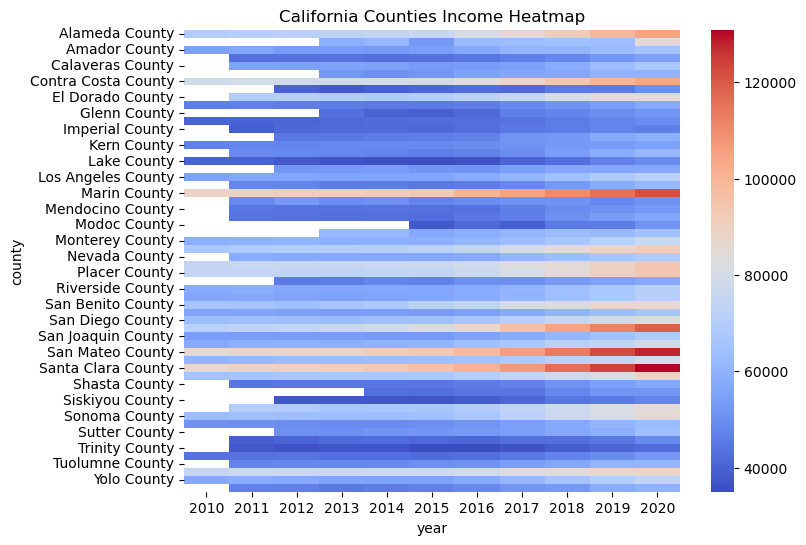

In [16]:
ca_income_pivot = ca_station_inc.pivot_table(index="county", columns="year", values= "median_income")
plt.figure(figsize=(8,6))
sns.heatmap(ca_income_pivot, cmap="coolwarm")
plt.title("California Counties Income Heatmap")
plt.show

In [ ]:
# x_values = ca_station_inc['median_income']
# y_values = ca_station_inc['cumulative_ev_stations']
# plt.scatter(x_values,y_values)
# plt.xlabel('Median Income')
# plt.ylabel('EV Charging Stations')
# plt.show()

x_values = ca_station_inc['year']
y_values = ca_station_inc['cumulative_ev_stations']
plt.scatter(x_values,y_values)
plt.xlabel('Median Income')
plt.ylabel('EV Charging Stations')
plt.show()